In [1]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

import ast

from itertools import groupby 

In [2]:
nlp_parser = CoreNLPParser(url='http://localhost:9000')


In [37]:
# We have three functions as below;
# (1) find_common_subwords(sen1, sen2);
# sen1 : a first sentence; string
# sen2 : a second sentence; string
# return: the list of sub-words
def find_common_subwords(sen1, sen2):
    
    parse, = nlp_parser.raw_parse(sen1)
    s1 = Tree("ROOT", parse)
    
    parse, = nlp_parser.raw_parse(sen2)
    s2 = Tree("ROOT", parse)
    
    words_list = []

    for path in find_common_paths(sub_path_mining(s1), sub_path_mining(s2)):
        words_list.append(ast.literal_eval(path)[1])
        words_list.append(ast.literal_eval(path)[-2])

    return list(set(words_list))

In [38]:
# (2) find_common_paths(s1, s2);
# s1: a tree of the first sentence ( tree is returned by nlp_parser.raw_parse() )
# s2; a tree of the second sentence
# the list of all common paths between two sentences
def find_common_paths (s1, s2):
    l1 = []
    l2 = []
    
    def preprocess_path(path):
        for i in range(len(path)):
            if 3 == len(path[i]):
                path[i] = (path[i])[:2]
                
        
        return (path)
    
    def elem_consecutive_dups(path):
        return [x[0] for x in groupby(path)]
        
    for i in range(len(s1)):
        if "_leaf_" == (s1[i])[-1]:
            l1.append (str(elem_consecutive_dups(preprocess_path(s1[i]))))
        
    for i in range(len(s2)):
        if "_leaf_" == (s2[i])[-1]:
            # to check reverse as well
            l2.append (str(elem_consecutive_dups(preprocess_path(s2[i]))))
            
            temp_path = elem_consecutive_dups(preprocess_path(s2[i]))
            temp_path.reverse()
            l2.append (str(temp_path))
            
    return set(l1).intersection(l2)

In [39]:
# (3) sub_path_mining(tree):
# tree: a tree represented sentence
# return: all paths of all pairs of words (i.e., if sentence has n words, # of paths will be n(n-1)/2 )/
def sub_path_mining(tree):
    
    l = []
    
    # leaf node
    if str == type(tree) :
        
        # make a length-1 path and start building (a)
        return ([["_leaf_", tree]])
    
    # have a single child tree
    elif 1 == len(tree):
        for path in sub_path_mining(tree[0]):
            if "_leaf_" != path[-1]:
                # add this label and half_path keeps growing (b)
                l.append(path + [tree.label()])
                
            else :
                # if full path found, just keep it (c)
                l.append(path)
                
    # have mulitple child nodes
    else :
        for i in range(len(tree)):
            for path_1 in sub_path_mining(tree[i]):
                
                # path_1 is fully formed path, just add and continue (d)
                if "_leaf_" == path_1[-1] :
                    l.append(path_1)
                    continue
                
    
                l.append(path_1 + [tree.label()])
                
                for j in range(i+1, len(tree)):
                    for path_2 in sub_path_mining(tree[j]):

                        # if path_2 is a full path, it should have been already added by (d), (e)
                        if "_leaf_" != path_2[-1] :
                            path_2.reverse()
                            
                            # construct half_path + half_path and build a full path (f)
                            l.append(path_1 + [tree.label()] + path_2)
                        
    return (l)


In [40]:
s1 = 'A D_STRUCTURE of type D_TYPE'
s2 = 'A CONSTANT_NUM D D_STRUCTURE of type D_TYPE'

In [35]:
find_common_subwords(s1, s2)

[]

In [44]:
tree1 = nlp_parser.raw_parse(s1)
tree2 = nlp_parser.raw_parse(s2)

t1 = Tree("ROOT", tree1)
t2 = Tree("ROOT", tree2)

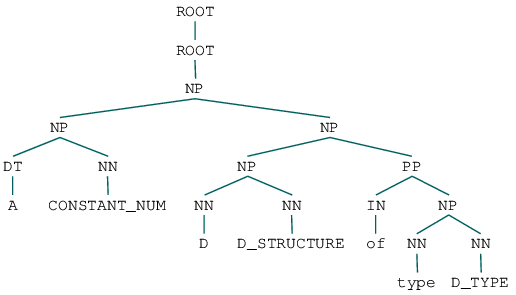

In [64]:
t2

In [26]:
find_common_paths(sub_path_mining(s1), sub_path_mining(s2))

set()

In [41]:
find_common_subwords("probability of an element to be zeroed", \
                     "The ground-truth probability of the random value fall in a specific bucket")

['of', 'probability']

In [49]:
sub_path_mining(t2)

[['_leaf_', 'A', 'DT', 'NP', 'NP', 'ROOT', 'ROOT'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'NP', 'NP', 'NN', 'D', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'NP', 'NP', 'NN', 'D_STRUCTURE', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'NP', 'PP', 'IN', 'of', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'NP', 'PP', 'NP', 'NN', 'type', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'NP', 'PP', 'NP', 'NN', 'D_TYPE', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NN', 'CONSTANT_NUM', '_leaf_'],
 ['_leaf_', 'CONSTANT_NUM', 'NN', 'NP', 'NP', 'ROOT', 'ROOT'],
 ['_leaf_', 'CONSTANT_NUM', 'NN', 'NP', 'NP', 'NP', 'NP', 'NN', 'D', '_leaf_'],
 ['_leaf_',
  'CONSTANT_NUM',
  'NN',
  'NP',
  'NP',
  'NP',
  'NP',
  'NN',
  'D_STRUCTURE',
  '_leaf_'],
 ['_leaf_',
  'CONSTANT_NUM',
  'NN',
  'NP',
  'NP',
  'NP',
  'PP',
  'IN',
  'of',
  '_leaf_'],
 ['_leaf_',
  'CONSTANT_NUM',
  'NN',
  'NP',
  'NP',
  'NP',
  'PP',
  'NP',
  'NN',
  'type',
  '_leaf_'],
 ['_leaf_',
  'CONSTANT_NUM',
  'NN',
  'NP',
  'NP

In [52]:
common_path = find_common_paths(sub_path_mining(t1), sub_path_mining(t2))

In [59]:
p0 = list(common_path)[0]

In [60]:
ast.literal_eval(p0)

['_leaf_', 'D_STRUCTURE', 'NN', 'NP', 'PP', 'IN', 'of', '_leaf_']

In [61]:
common_path

{"['_leaf_', 'A', 'DT', 'NP', 'NN', 'D_STRUCTURE', '_leaf_']",
 "['_leaf_', 'A', 'DT', 'NP', 'PP', 'IN', 'of', '_leaf_']",
 "['_leaf_', 'A', 'DT', 'NP', 'PP', 'NP', 'NN', 'D_TYPE', '_leaf_']",
 "['_leaf_', 'A', 'DT', 'NP', 'PP', 'NP', 'NN', 'type', '_leaf_']",
 "['_leaf_', 'D_STRUCTURE', 'NN', 'NP', 'PP', 'IN', 'of', '_leaf_']",
 "['_leaf_', 'D_STRUCTURE', 'NN', 'NP', 'PP', 'NP', 'NN', 'D_TYPE', '_leaf_']",
 "['_leaf_', 'D_STRUCTURE', 'NN', 'NP', 'PP', 'NP', 'NN', 'type', '_leaf_']",
 "['_leaf_', 'of', 'IN', 'PP', 'NP', 'NN', 'D_TYPE', '_leaf_']",
 "['_leaf_', 'of', 'IN', 'PP', 'NP', 'NN', 'type', '_leaf_']",
 "['_leaf_', 'type', 'NN', 'NP', 'NN', 'D_TYPE', '_leaf_']"}

In [62]:
sub_path_mining(t1)

[['_leaf_', 'A', 'DT', 'NP', 'NP', 'ROOT', 'ROOT'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'PP', 'IN', 'of', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'PP', 'NP', 'NN', 'type', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NP', 'PP', 'NP', 'NN', 'D_TYPE', '_leaf_'],
 ['_leaf_', 'A', 'DT', 'NP', 'NN', 'D_STRUCTURE', '_leaf_'],
 ['_leaf_', 'D_STRUCTURE', 'NN', 'NP', 'NP', 'ROOT', 'ROOT'],
 ['_leaf_', 'D_STRUCTURE', 'NN', 'NP', 'NP', 'PP', 'IN', 'of', '_leaf_'],
 ['_leaf_',
  'D_STRUCTURE',
  'NN',
  'NP',
  'NP',
  'PP',
  'NP',
  'NN',
  'type',
  '_leaf_'],
 ['_leaf_',
  'D_STRUCTURE',
  'NN',
  'NP',
  'NP',
  'PP',
  'NP',
  'NN',
  'D_TYPE',
  '_leaf_'],
 ['_leaf_', 'of', 'IN', 'PP', 'NP', 'ROOT', 'ROOT'],
 ['_leaf_', 'of', 'IN', 'PP', 'NP', 'NN', 'type', '_leaf_'],
 ['_leaf_', 'of', 'IN', 'PP', 'NP', 'NN', 'D_TYPE', '_leaf_'],
 ['_leaf_', 'type', 'NN', 'NP', 'PP', 'NP', 'ROOT', 'ROOT'],
 ['_leaf_', 'type', 'NN', 'NP', 'NN', 'D_TYPE', '_leaf_'],
 ['_leaf_', 'D_TYPE', 'NN', 'NP', 'PP', 'N